# Logistic `Regression`
-----
1.	Logistic regression, despite its name, is a linear model for `classification` rather than regression.
2.	Logistic regression is also known in the literature as `logit regression`, `maximum-entropy classification (MaxEnt)` or the `log-linear classifier`. 
3.	In this model, the probabilities describing the possible outcomes of a single trial are modelled using a `logistic function`.
4.	A logistic function or logistic curve is a common "S" shape (sigmoid curve), with equation

    <b>$f(x) =\frac {L}{1+e^{-k(x-x_{0})}}$</b>
    ----
    
    ![image](https://github.com/rritec/datahexa/blob/master/images/ml/logreg.png?raw=true)
    
    <b>$f(x) =\frac {1}{1+e^{-x}}$</b>
    
    
5. Maths behind it, just walk through it. If you are not understand do not be panic

    a.	https://en.wikipedia.org/wiki/Logistic_function
    
    b.	https://en.wikipedia.org/wiki/Logistic_regression
    
    c.  http://scikit-learn.org/dev/modules/linear_model.html#logistic-regression




**Business Problem Statement:**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has **diabetes**, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.    

## Step 1: Import required modules

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Step 2: Load and understand the data

In [4]:
import os 
os.chdir("C:\\Users\\ramreddymyla\\Google Drive\\01 DS ML DL NLP and AI With Python Lab Copy\\02 Lab Data\\Python")

In [5]:
os.getcwd()

'C:\\Users\\ramreddymyla\\Google Drive\\01 DS ML DL NLP and AI With Python Lab Copy\\02 Lab Data\\Python'

In [6]:
import pandas as pd
df = pd.read_csv("pima-indians-diabetes.txt")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
X = df[["pregnancies","glucose","diastolic","triceps","insulin","bmi","dpf","age"]]

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [10]:
y=df["diabetes"] 

In [11]:
type(y)

pandas.core.series.Series

In [12]:
type(X)

pandas.core.frame.DataFrame

In [14]:
np.unique?

In [15]:
import numpy as np
np.unique(y,return_counts=True)

(array([0, 1], dtype=int64), array([500, 268], dtype=int64))

## Step 3: Split into Train Test data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,
                                                   random_state=42 # seed 
                                            )

In [12]:
X_train.shape

(460, 8)

In [13]:
type(X_train)

pandas.core.frame.DataFrame

In [14]:
768* 0.6

460.79999999999995

In [15]:
type(X_test)

pandas.core.frame.DataFrame

In [16]:
X_test.shape

(308, 8)

In [17]:
type(y_train)

pandas.core.series.Series

In [18]:
y_train.shape

(460,)

In [19]:
y_train[2:14]

249    0
22     1
221    1
526    0
751    0
752    0
424    1
644    0
203    0
500    0
93     1
369    1
Name: diabetes, dtype: int64

In [20]:
X_train[2:14]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
249,1,111,86,19,0,30.1,0.143,23
22,7,196,90,0,0,39.8,0.451,41
221,2,158,90,0,0,31.6,0.805,66
526,1,97,64,19,82,18.2,0.299,21
751,1,121,78,39,74,39.0,0.261,28
752,3,108,62,24,0,26.0,0.223,25
424,8,151,78,32,210,42.9,0.516,36
644,3,103,72,30,152,27.6,0.730,27
203,2,99,70,16,44,20.4,0.235,27
500,2,117,90,19,71,25.2,0.313,21


## Step 4: Fit the algorithm

In [21]:
LogisticRegression?

In [22]:
log = LogisticRegression()

In [23]:
log.fit(X_train,y_train)

C:\Users\ramreddymyla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Step 5: Predict

In [24]:
y_pred = log.predict(X_test)

In [25]:
y_test[2:14]

624    0
690    0
473    0
204    0
97     0
336    0
568    0
148    0
667    1
212    0
199    1
265    0
Name: diabetes, dtype: int64

In [26]:
y_pred[2:14]

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

## Step 6: Check accuracy

In [27]:
accuracy_score(y_test,y_pred)

0.7792207792207793

## Step 7: Confusion Matrix
--------

* Right answers
1. How many members really not suffering with diabetes and machine also labeling as no diabetes ?? 174
2. How many members really suffering with diabetes and machine also labeling as diabetes ?? 66

* Wrong answers
1. How many members really suffering with diabetes and machine labeling as no diabetes ?? 32
2. How many members really not suffering with diabetes and machine labeling as diabetes ?? 36

In [28]:
confusion_matrix?

In [29]:
confusion_matrix(y_test,y_pred)

array([[174,  32],
       [ 36,  66]], dtype=int64)

In [30]:
174+32+36+66

308

- Real values and machine values are on same page then T else F
- P or N is decided based on Real Values(Ground Truth)

![image](https://github.com/rritec/datahexa/blob/dev/images/ds000003.png?raw=true)

[Read about confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)


## Step 8: Classification Report
--------

- `Precision:` When it predicts yes, how often is it correct? When it predicts No, how often is it correct? 

    - Precision = TP/(FP+TP)(a.k.a actual yes) = 66/98=0.67
    - Precision = TN/(TN+FN) (a.k.a actual NO)    = 174/210=0.828
    
- `True Positive Rate/Sensitivity/Recall`: When it's actually yes, how often does it predict yes? or When it's actually no, how often does it predict no?

    - TP/(TP+FN)(aka predicted yes) = 66/(36+66)=0.647
    - TN/(TN+FP)(aka predicted No) = 174/(174+32)=0.84
    
- `F Score:` This is a weighted average of the true positive rate (recall) and precision	

    - $F1-score = \frac {(2 * precision * recall)}{(precision + recall)}$  
    
- `Support:` 
    - Actual No label patients count =174 + 32 = 206
    - Actual Yes label patients count =36+66 = 102


In [31]:
classification_report?

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



## ROC Curve
-----------------

- Receiver Operating Characteristic(ROC) Curve
- The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings
- In machine learning The true-positive rate is also known as sensitivity, recall or probability of detection Linear regression
- The false-positive rate is also known as the fall-out or probability of `False` alarm

[Read about ROC Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)


In [1]:
# Import necessary modules
from sklearn.metrics import roc_curve

In [3]:
roc_curve?

In [35]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [36]:
log.predict_proba(X_test)[10:15]

array([[0.66635194, 0.33364806],
       [0.26491663, 0.73508337],
       [0.5133914 , 0.4866086 ],
       [0.67306851, 0.32693149],
       [0.85095436, 0.14904564]])

In [37]:
# Compute predicted probabilities of positive class: y_pred_prob
y_pred_prob = log.predict_proba(X_test)[:,1]

In [38]:
y_pred_prob[10:15]

array([0.33364806, 0.73508337, 0.4866086 , 0.32693149, 0.14904564])

In [4]:
roc_curve?

In [40]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

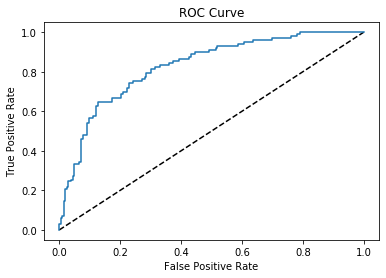

In [42]:
# Plot ROC curve
import matplotlib.pyplot as plt 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## AUC computation
----------

In [3]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve

In [4]:
roc_curve?

In [5]:
roc_auc_score??

In [40]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [41]:
log.predict_proba(X_test)[:5]

array([[0.61760456, 0.38239544],
       [0.77666437, 0.22333563],
       [0.78202778, 0.21797222],
       [0.75147717, 0.24852283],
       [0.54380739, 0.45619261]])

In [42]:
# Compute predicted probabilities: y_pred_prob # related yes label # 1 label
y_pred_prob = log.predict_proba(X_test)[:,1]


In [43]:
y_pred_prob

array([0.38239544, 0.22333563, 0.21797222, 0.24852283, 0.45619261,
       0.4647072 , 0.06922637, 0.70211634, 0.51327821, 0.67412823,
       0.33364806, 0.73508337, 0.4866086 , 0.32693149, 0.14904564,
       0.40808616, 0.1873179 , 0.15590203, 0.8730464 , 0.51994481,
       0.29324969, 0.13007539, 0.48767539, 0.17361885, 0.54867902,
       0.74040741, 0.21790593, 0.08528901, 0.27221044, 0.19065935,
       0.73234752, 0.7443194 , 0.69555902, 0.82621074, 0.47629831,
       0.62090877, 0.78992283, 0.20497415, 0.50744244, 0.77526792,
       0.15994615, 0.54867365, 0.47687359, 0.44223726, 0.08126051,
       0.48441609, 0.51592898, 0.26116063, 0.40255081, 0.85337301,
       0.11988658, 0.57289121, 0.75693742, 0.31274596, 0.21420386,
       0.10102415, 0.69395434, 0.06501461, 0.38367504, 0.7037484 ,
       0.61420634, 0.34330456, 0.3219751 , 0.40993552, 0.13111207,
       0.42114779, 0.11710526, 0.58439686, 0.08932494, 0.71813544,
       0.66848007, 0.12086153, 0.30089852, 0.15278756, 0.20314

In [44]:
roc_auc_score?

In [45]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))


AUC: 0.8268608414239483


In [46]:
accuracy_score(y_test,y_pred)

0.7792207792207793

In [47]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(log, X, y, cv=5, scoring='roc_auc')
# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.7987037  0.80759259 0.81944444 0.86622642 0.85056604]


## Hyperparameter tuning with GridSearchCV

In [48]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()
# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
# Fit it to the data
logreg_cv.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 163789.3706954068}
Best score is 0.7721354166666666


> **Home Work:** [With one more dataset](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

In [ ]:
# after doing above home work,you need to answer
## Balanced Vs Unbalanced Data
### How to convert unbalanced data into balanced
#### oversampling
#### Under Sampling
##### smote